# Self-Driving Car Nanodegree

## Project: Advanced Lane Finidng

## Imports

In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob
%matplotlib inline

## Camera Calibration

### Get image points from chessboard

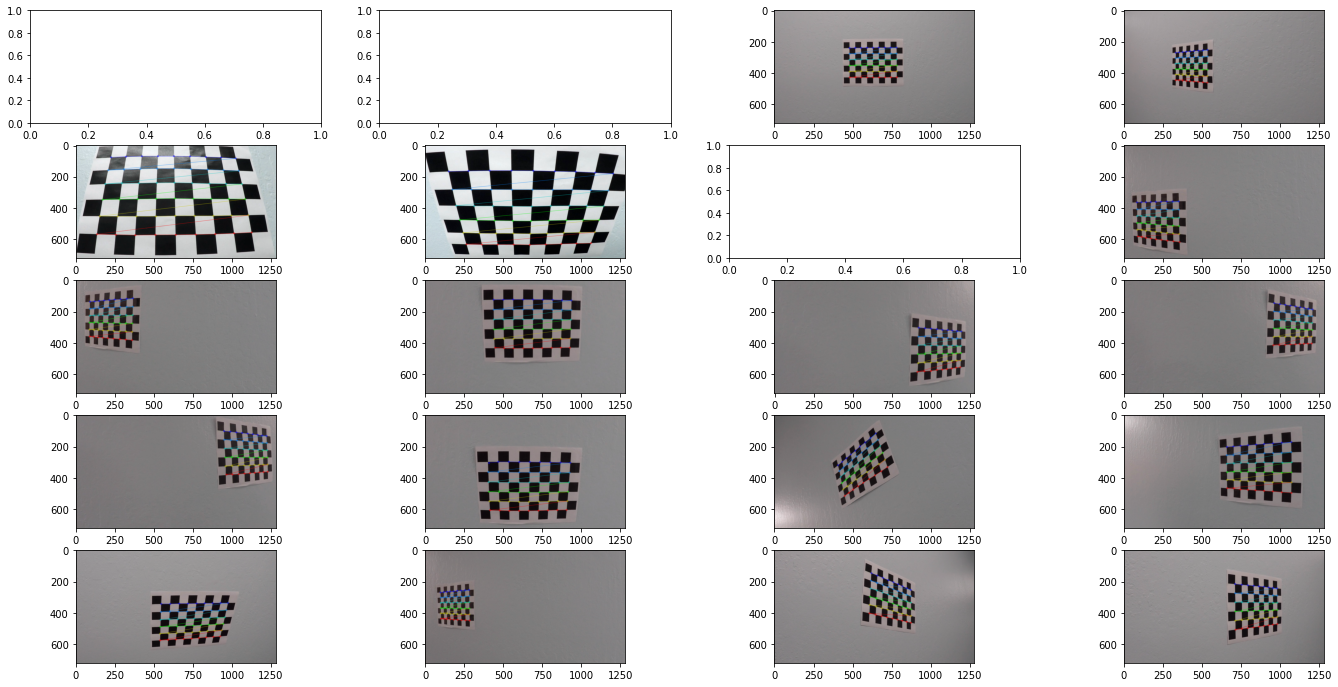

In [20]:
# dims of the chess board
nx = 9
ny = 6

# prepare the object point array [(0,0,0), (1,0,0) ... (9,6,0)]
objp = np.zeros((ny*nx,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

# used to diplay the result on one plot
f, axarr = plt.subplots(5,4,figsize=(24, 12))
counter = 0

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners (used for testing)
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        axarr[counter//4,counter%4].imshow(img)

    counter += 1

# cv2.destroyAllWindows()

### Get camera matrix and distortion coefficients

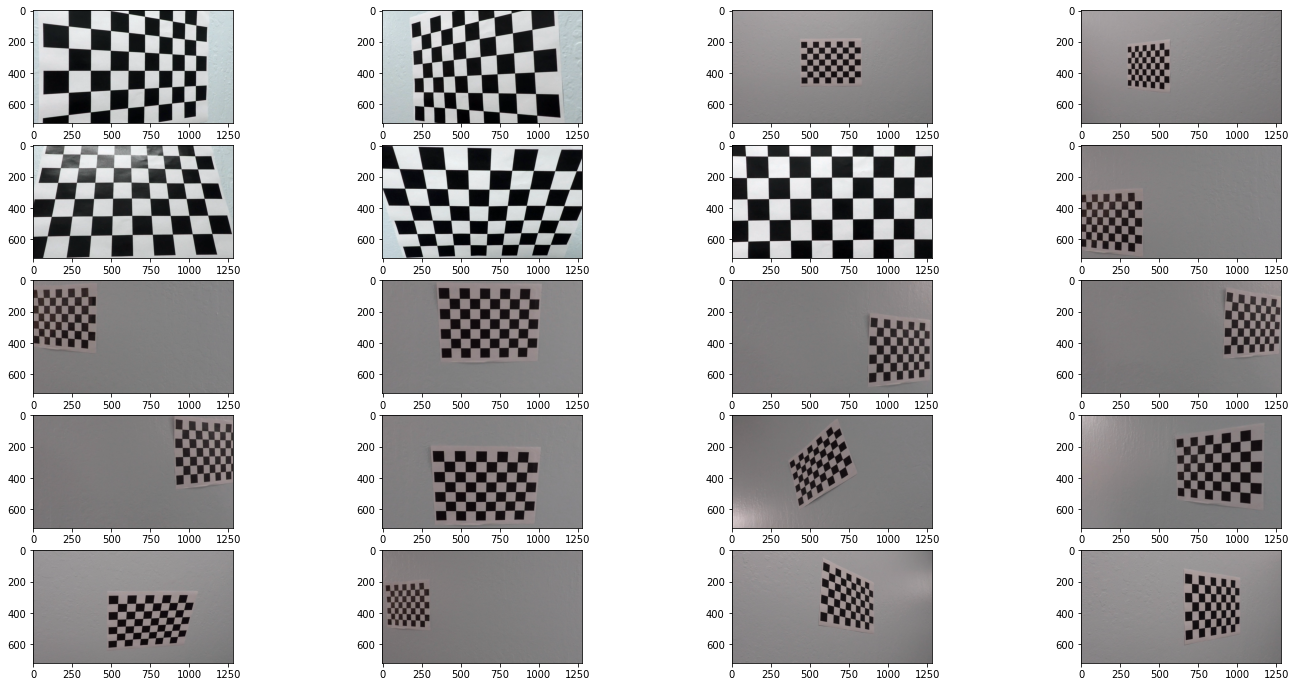

<Figure size 432x288 with 0 Axes>

In [22]:
# performs the camera calibration, image distortion correction and 
# returns the undistorted image
def cal_undistort(img, objpoints, imgpoints):
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1::-1], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

# used to diplay the result on one plot
f, axarr = plt.subplots(5,4,figsize=(24, 12))
counter = 0

# used for testing only
# show all undistorted chessboards
plt.figure()
for fname in images:
    img = cv2.imread(fname)
    undistorted = cal_undistort(img, objpoints, imgpoints)
    axarr[counter//4,counter%4].imshow(undistorted)
    counter += 1